# FRED

Uso de APIs externas, en este caso la API de la Reserva Federal de St. Louis: [FRED](https://fred.stlouisfed.org).

Para ello se usará el paquete [fredapi](https://pypi.org/project/fredapi/).

## Carga de clave para API

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

## Serie básica

En este caso, `serie_us` es un objeto tipo `pandas.Series` (ver documentación para [`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html))

### Descarga de datos

In [2]:
from fredapi import Fred

fred = Fred()
serie_us = fred.get_series('GDP')

In [3]:
serie_us

1946-01-01          NaN
1946-04-01          NaN
1946-07-01          NaN
1946-10-01          NaN
1947-01-01      243.164
                ...    
2024-04-01    29016.714
2024-07-01    29374.914
2024-10-01    29723.864
2025-01-01    29962.047
2025-04-01    30353.902
Length: 318, dtype: float64

### Graficado

Se usa el método `.plot()`, ver documentación para [`pandas.Series.plot`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html).

Se usa internamente la librería [`matplotlib`](https://matplotlib.org).

<Axes: title={'center': 'PIB de Estados Unidos'}, xlabel='Fecha', ylabel='Miles de millones de USD'>

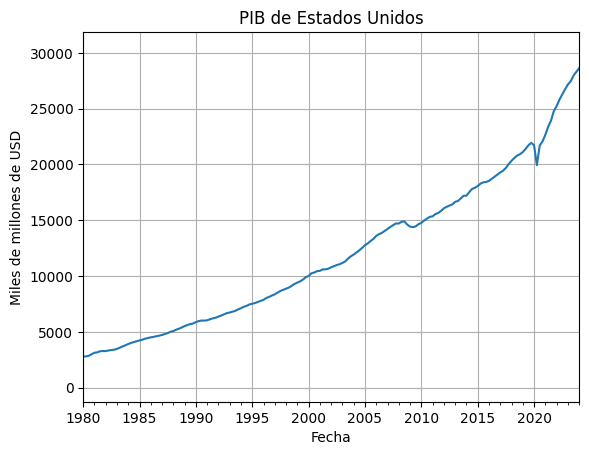

In [4]:
serie_us.plot(grid=True, xlabel='Fecha', ylabel='Miles de millones de USD', title='PIB de Estados Unidos', xlim=['1980','2024'])

## Varias series

Ver documentación para [`matplotlib.pyplot.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

In [5]:
serie_es = fred.get_series('CPMNACSCAB1GQES')/1000
serie_fr = fred.get_series('CPMNACSCAB1GQFR')/1000
serie_de = fred.get_series('CPMNACSCAB1GQDE')/1000

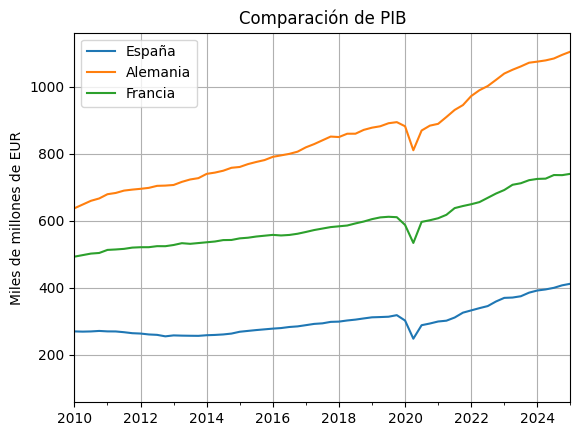

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

serie_es.plot(ax=ax)
serie_de.plot(ax=ax)
serie_fr.plot(ax=ax, title="Comparación de PIB", grid=True, ylabel="Miles de millones de EUR", xlim=["2010", "2025"])

ax.legend(["España", "Alemania", "Francia"])

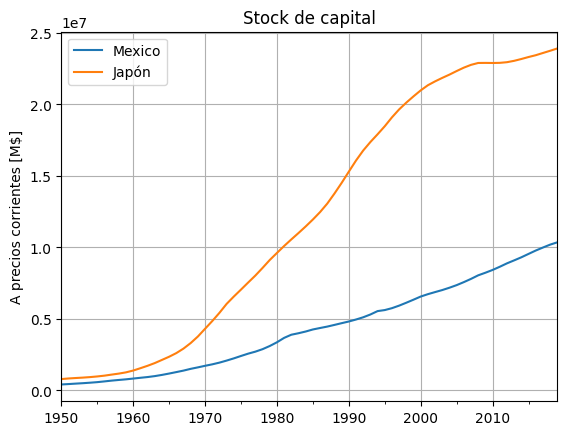

In [13]:
s_mx = fred.get_series('RKNANPMXA666NRUG')
s_jp = fred.get_series('RKNANPJPA666NRUG')

fig, ax = plt.subplots()
s_mx.plot(ax=ax, label='Mexico')
s_jp.plot(ax=ax, title='Stock de capital', grid=True, ylabel='A precios corrientes [M$]', x='Año', label='Japón')

ax.legend()

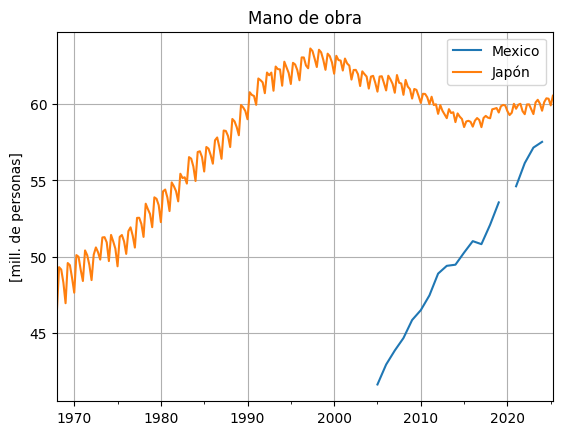

In [23]:
s_mx = fred.get_series('LFAC64TTMXA647N')/1e6
s_jp = fred.get_series('LFAC64TTJPQ647N')/1e6

fig, ax = plt.subplots()
s_mx.plot(ax=ax, label='Mexico')
s_jp.plot(ax=ax, title='Mano de obra', grid=True, ylabel='[mill. de personas]', x='Año', label='Japón')

ax.legend()